In [34]:
import os
from random import choice
from PIL import Image
import numpy as np

class DatasetLoader():
    def __init__(self, source_path = 'D:\!EMONEW_cropped', classes = 7):
        self.source_path = os.path.normpath(source_path)
        self.data = []
        self.num_classes = classes
        
        for path in os.listdir(path=source_path):
            source_path = os.path.join(self.source_path, path)
            if os.path.isdir(source_path):
                classes = classes - 1
                target = [0]*self.num_classes
                target[classes] = 1
                self._list_to_jpeg(source_path, target)
            
    def _list_to_jpeg(self, path, target):
        for i in os.walk(path):
            for j in i[2]:
                if '.jpg' in j or '.png' in j:
                    self.data.append([[os.path.join(i[0], j)], target])
    def get_batch(self, len_batch):
        batch_data = []
        batch_target = []
        for i in range(len_batch):
            d, t = choice(self.data)
            batch_target.append(t)
            batch_data.append(np.asarray(Image.open(d[0])).transpose(2,0,1))
        return np.array(batch_data), np.array(batch_target)

In [35]:
data = DatasetLoader()

In [47]:
data.get_batch(16)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [11]:
im = Image.open('cat.jpg')

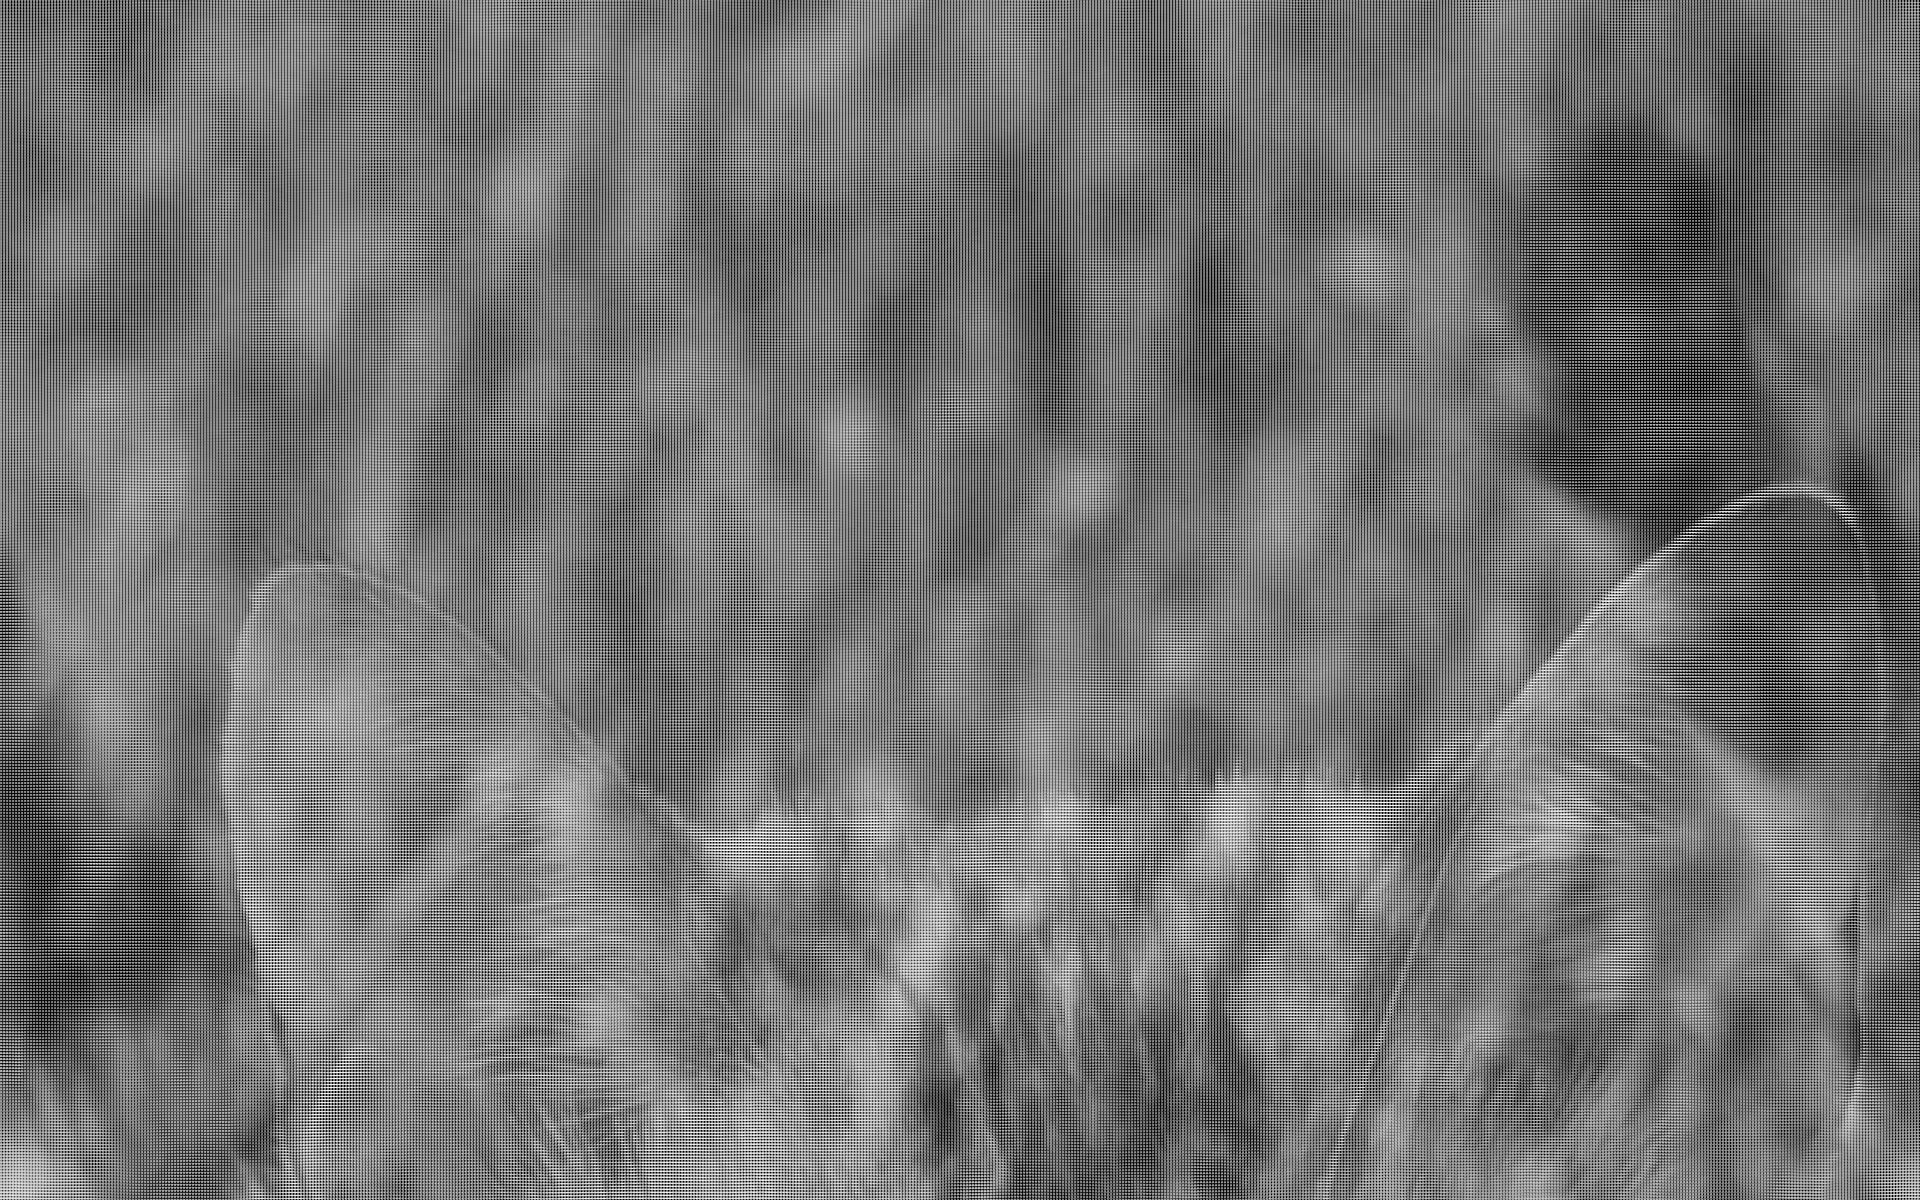

In [13]:
Image.fromarray(np.asarray(im).reshape(3,1200,1920)[0])

In [18]:
import matplotlib.pyplot as plt
import cv2

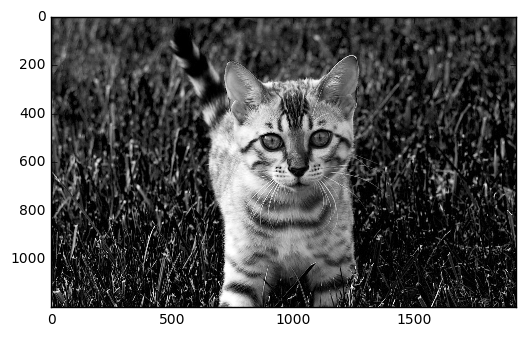

In [25]:
plt.imshow(np.asarray(im).transpose(2,0,1)[2], cmap = 'gray')
plt.show()

In [27]:
np.asarray(im).transpose(2,0,1).shape

(3, 1200, 1920)